In [ ]:
!pip install --upgrade pip
!pip install --upgrade setuptools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.5/821.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
!pip install yfinance --upgrade --no-cache-dir#api que trae datos de acciones


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --no-cache-dir#api


In [ ]:
#library
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# After Series tiempos

La idea es poder realizar un ejercio simple de entrenamiento de series de tiempos , donde trataremos de realizar una breve investigacion de un dato para predecir la misma



## Carga de Datasets

In [ ]:
df_spy = yf.download('SPY', start='1993-02-01', end='2024-03-18')
df_spy.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-02-01,43.96875,44.25000,43.96875,44.25000,24.939865,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,24.992695,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.256897,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.362581,531500
1993-02-05,44.96875,45.06250,44.71875,44.96875,25.344965,492100
1993-02-08,44.96875,45.12500,44.90625,44.96875,25.344965,596100
1993-02-09,44.81250,44.81250,44.56250,44.65625,25.168846,122100
1993-02-10,44.65625,44.75000,44.53125,44.71875,25.204079,379600
1993-02-11,44.78125,45.12500,44.78125,44.93750,25.327341,19500


In [ ]:
df_spy.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

##Plots

In [ ]:
from bokeh.io import output_file, show
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook
output_notebook()

# Create the ColumnDataSource object

data = ColumnDataSource(df_spy)

# Create time series plot
plot = figure(x_axis_type='datetime',#TIPO DE DATOS DE X
              title='Sp500 close prices ts plot',
             x_axis_label = "Date",
              y_axis_label = "Prices in $")
#TEMPORAL SE GRAFICA LINEALMENTE
plot.line(x='Date', y = 'Close', source = data, color = 'red')
show(plot)

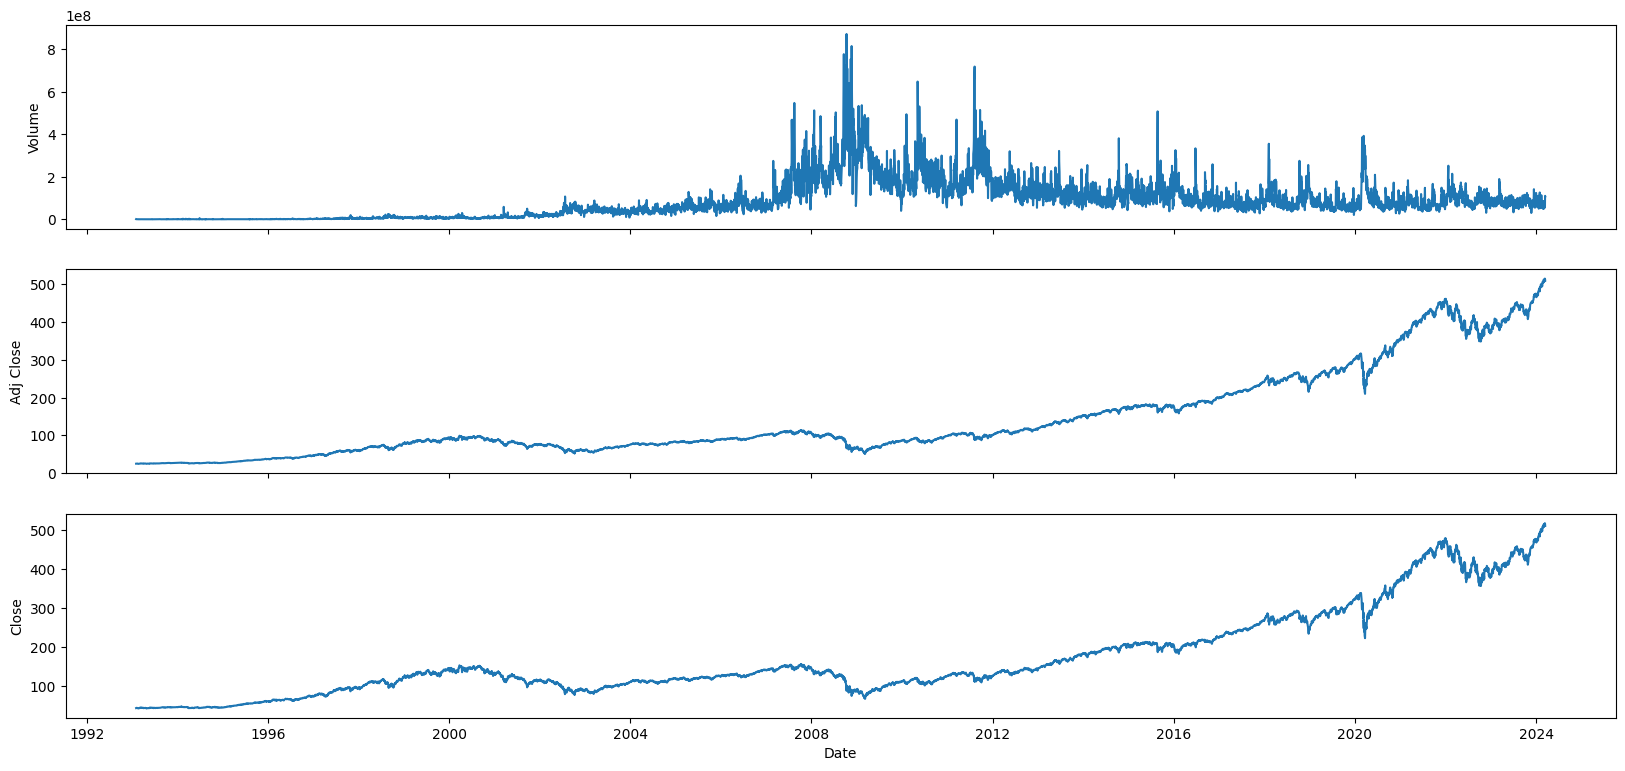

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(20, 9), sharex=True)#--sharex=True va a compartir X
#
sns.lineplot(x="Date", y="Close", data=df_spy, ax=ax[2])
sns.lineplot(x="Date", y="Adj Close", data=df_spy, ax=ax[1])
sns.lineplot(x="Date", y="Volume", data=df_spy, ax=ax[0])

plt.show()

##Verificacion de estacionalidad y descomposicion

In [ ]:
#copy df to work with it
df = df_spy.copy()
df.sort_index(inplace= True)

In [ ]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-02-01,43.96875,44.25000,43.96875,44.25000,24.939865,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,24.992695,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.256897,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.362581,531500
1993-02-05,44.96875,45.06250,44.71875,44.96875,25.344965,492100
1993-02-08,44.96875,45.12500,44.90625,44.96875,25.344965,596100
1993-02-09,44.81250,44.81250,44.56250,44.65625,25.168846,122100
1993-02-10,44.65625,44.75000,44.53125,44.71875,25.204079,379600
1993-02-11,44.78125,45.12500,44.78125,44.93750,25.327341,19500


In [ ]:
#si observamos vemos que date esta icnompleto primero debemos completar la temporalidad
df = df.asfreq('D')

In [ ]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-02-01,43.96875,44.25000,43.96875,44.25000,24.939865,480500.0
1993-02-02,44.21875,44.37500,44.12500,44.34375,24.992695,201300.0
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.256897,529400.0
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.362581,531500.0
1993-02-05,44.96875,45.06250,44.71875,44.96875,25.344965,492100.0
1993-02-06,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-07,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-08,44.96875,45.12500,44.90625,44.96875,25.344965,596100.0
1993-02-09,44.81250,44.81250,44.56250,44.65625,25.168846,122100.0


In [ ]:
#rellamos los nan con el valor de la fila previa
df.fillna(method='ffill', inplace=True)#bfill

In [ ]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-02-01,43.96875,44.25000,43.96875,44.25000,24.939865,480500.0
1993-02-02,44.21875,44.37500,44.12500,44.34375,24.992695,201300.0
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.256897,529400.0
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.362581,531500.0
1993-02-05,44.96875,45.06250,44.71875,44.96875,25.344965,492100.0
1993-02-06,44.96875,45.06250,44.71875,44.96875,25.344965,492100.0
1993-02-07,44.96875,45.06250,44.71875,44.96875,25.344965,492100.0
1993-02-08,44.96875,45.12500,44.90625,44.96875,25.344965,596100.0
1993-02-09,44.81250,44.81250,44.56250,44.65625,25.168846,122100.0


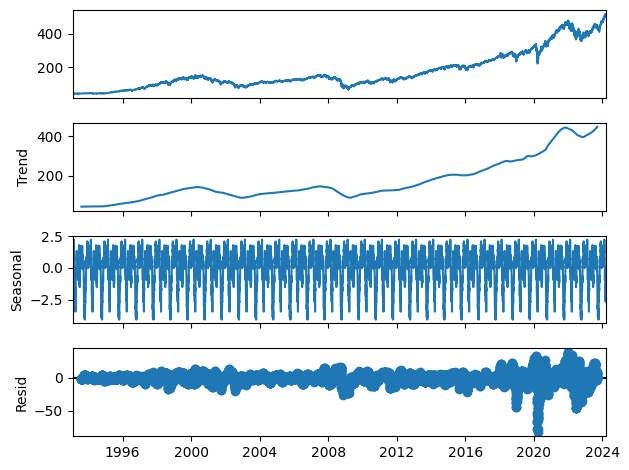

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose#usamos esta libreria para analizar la estacionalidad
result = seasonal_decompose(df[['Close']], period=365) #presuponemos que hay una estacionalidad anual
result.plot();

### test de estacionalidad

Es muy importante poder realizar este tipo de test para cuando tenemos un problema de series de tiempo.

Existe algoritmo de entrenamiento como los ARIMA que necesitan de esta estructura y cuando un problema podemos controlarlo con la estacionalidad se hace mas facil de predecir


In [ ]:
def check_test(data):

  result = adfuller(data)#adfuller para estacionalidad
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])#p value mayor 0.05 tengo rechazar la hipotesis alternativa
  if result[1]>= 0.05:
    print(f"La variable {data.name} es no estacionario")
  else:
    print(f"La variable  {data.name} es estacionario")

check_test(df['Close'])

ADF Statistic: 1.805350
p-value: 0.998360
La variable Close es no estacionario


In [ ]:
df['Close']

Date
1993-02-01     44.250000
1993-02-02     44.343750
1993-02-03     44.812500
1993-02-04     45.000000
1993-02-05     44.968750
                 ...    
2024-03-11    511.279999
2024-03-12    516.780029
2024-03-13    515.969971
2024-03-14    514.950012
2024-03-15    509.829987
Freq: D, Name: Close, Length: 11366, dtype: float64

In [ ]:
df['Close'].diff()[1:]

Date
1993-02-02    0.093750
1993-02-03    0.468750
1993-02-04    0.187500
1993-02-05   -0.031250
1993-02-06    0.000000
                ...   
2024-03-11   -0.440002
2024-03-12    5.500031
2024-03-13   -0.810059
2024-03-14   -1.019958
2024-03-15   -5.120026
Freq: D, Name: Close, Length: 11365, dtype: float64

In [ ]:
#com la variable es no estacionaria debemos transformarla

#Aplica el logaritmo natural a la serie close
print(f"chequeo con logaritmo")
check_test(np.log(df['Close']))

print(f"\nChequeo con diferenciacion")
#diferenciacion
check_test(df['Close'].diff()[1:])#Aplica la diferenciación a la serie de precios de cierre (Close) utilizando .diff() de pandas para calcular la diferencia entre cada elemento y su elemento anterior
#El [1:] se utiliza para eliminar el primer valor de la serie diferenciada, ya que puede ser NaN debido a la diferencia.

chequeo con logaritmo
ADF Statistic: -0.543583
p-value: 0.883227
La variable Close es no estacionario

Chequeo con diferenciacion
ADF Statistic: -17.619762
p-value: 0.000000
La variable  Close es estacionario


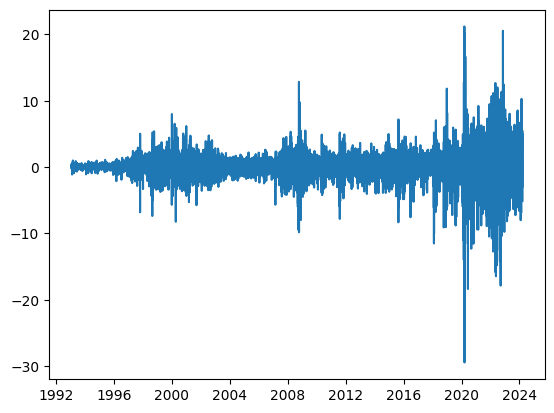

In [ ]:
plt.plot(df.iloc[1:].index, df['Close'].diff()[1:]);

## Transformacion de datos

In [ ]:
df['diff_close'] = df['Close'].diff()
df = df.dropna(subset=["diff_close"])#elimanamos los valores nan
df.head()

,Open,High,Low,Close,Adj Close,Volume,diff_close
Date,,,,,,,
1993-02-02,44.21875,44.37500,44.12500,44.34375,24.992695,201300.0,0.09375
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.256897,529400.0,0.46875
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.362581,531500.0,0.18750
1993-02-05,44.96875,45.06250,44.71875,44.96875,25.344965,492100.0,-0.03125
1993-02-06,44.96875,45.06250,44.71875,44.96875,25.344965,492100.0,0.00000


In [ ]:
df["diff_close"].shift(1)

Date
1993-02-02         NaN
1993-02-03    0.093750
1993-02-04    0.468750
1993-02-05    0.187500
1993-02-06   -0.031250
                ...   
2024-03-11    0.000000
2024-03-12   -0.440002
2024-03-13    5.500031
2024-03-14   -0.810059
2024-03-15   -1.019958
Freq: D, Name: diff_close, Length: 11365, dtype: float64

In [ ]:
#calcula la diferencia entre los valores de la columna "diff_close" en filas consecutivas y almacena esta diferencia en una nueva columna llamada "diff_close_p1"
df['diff_close_p1'] = df["diff_close"].shift(1)#.shift(1): Esta parte del código desplaza hacia abajo los valores de la columna "diff_close" en una fila. El argumento 1 indica que los valores se desplazarán hacia abajo en una posición. Esto significa que cada valor en la nueva columna "diff_close_p1" será el valor de "diff_close" de la fila anterior.
df['diff_close_p2'] = df["diff_close"].shift(2)
df['diff_close_p3'] = df["diff_close"].shift(3)
df['diff_close_p4'] = df["diff_close"].shift(4)
df = df.fillna(0)
#útil para análisis de series temporales donde se necesita comparar los cambios en los valores entre pasos de tiempo consecutivos.

In [ ]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,diff_close,diff_close_p1,diff_close_p2,diff_close_p3,diff_close_p4
Date,,,,,,,,,,,
1993-02-02,44.21875,44.37500,44.12500,44.34375,24.992695,201300.0,0.09375,0.00000,0.00000,0.00000,0.00000
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.256897,529400.0,0.46875,0.09375,0.00000,0.00000,0.00000
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.362581,531500.0,0.18750,0.46875,0.09375,0.00000,0.00000
1993-02-05,44.96875,45.06250,44.71875,44.96875,25.344965,492100.0,-0.03125,0.18750,0.46875,0.09375,0.00000
1993-02-06,44.96875,45.06250,44.71875,44.96875,25.344965,492100.0,0.00000,-0.03125,0.18750,0.46875,0.09375
1993-02-07,44.96875,45.06250,44.71875,44.96875,25.344965,492100.0,0.00000,0.00000,-0.03125,0.18750,0.46875
1993-02-08,44.96875,45.12500,44.90625,44.96875,25.344965,596100.0,0.00000,0.00000,0.00000,-0.03125,0.18750
1993-02-09,44.81250,44.81250,44.56250,44.65625,25.168846,122100.0,-0.31250,0.00000,0.00000,0.00000,-0.03125
1993-02-10,44.65625,44.75000,44.53125,44.71875,25.204079,379600.0,0.06250,-0.31250,0.00000,0.00000,0.00000


In [ ]:
#calcula diferentes estadísticas móviles sobre la columna "diff_close_p1" del DataFrame
df['rolling_windows_mean'] = df['diff_close_p1'].rolling(window=2).mean()
df['rolling_windows_mean7'] = df['diff_close_p1'].rolling(window=7).mean()
df['rolling_windows_max'] = df['diff_close_p1'].rolling(window=2).max()
df['rolling_windows_min'] = df['diff_close_p1'].rolling(window=2).min()
df.dropna(inplace=True)

In [ ]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,diff_close,diff_close_p1,diff_close_p2,diff_close_p3,diff_close_p4,rolling_windows_mean,rolling_windows_mean7,rolling_windows_max,rolling_windows_min
Date,,,,,,,,,,,,,,,
1993-02-08,44.96875,45.12500,44.90625,44.96875,25.344965,596100.0,0.00000,0.00000,0.00000,-0.03125,0.18750,0.000000,0.102679,0.00000,0.00000
1993-02-09,44.81250,44.81250,44.56250,44.65625,25.168846,122100.0,-0.31250,0.00000,0.00000,0.00000,-0.03125,0.000000,0.102679,0.00000,0.00000
1993-02-10,44.65625,44.75000,44.53125,44.71875,25.204079,379600.0,0.06250,-0.31250,0.00000,0.00000,0.00000,-0.156250,0.044643,0.00000,-0.31250
1993-02-11,44.78125,45.12500,44.78125,44.93750,25.327341,19500.0,0.21875,0.06250,-0.31250,0.00000,0.00000,-0.125000,-0.013393,0.06250,-0.31250
1993-02-12,44.87500,44.87500,44.59375,44.59375,25.133619,42500.0,-0.34375,0.21875,0.06250,-0.31250,0.00000,0.140625,-0.008929,0.21875,0.06250
1993-02-13,44.87500,44.87500,44.59375,44.59375,25.133619,42500.0,0.00000,-0.34375,0.21875,0.06250,-0.31250,-0.062500,-0.053571,0.21875,-0.34375
1993-02-14,44.87500,44.87500,44.59375,44.59375,25.133619,42500.0,0.00000,0.00000,-0.34375,0.21875,0.06250,-0.171875,-0.053571,0.00000,-0.34375
1993-02-15,44.87500,44.87500,44.59375,44.59375,25.133619,42500.0,0.00000,0.00000,0.00000,-0.34375,0.21875,0.000000,-0.053571,0.00000,0.00000
1993-02-16,44.46875,44.46875,43.40625,43.46875,24.499533,374800.0,-1.12500,0.00000,0.00000,0.00000,-0.34375,0.000000,-0.053571,0.00000,0.00000


## Entrenamiento

In [ ]:
test_size = 12#numero lo puedo ir variando ultimos 12 dias para el test

train_df = df[:-test_size]
test_df = df[-test_size:]

In [ ]:
target = "diff_close"

features = ['diff_close_p1', 'diff_close_p2', 'diff_close_p3','diff_close_p4', 'rolling_windows_mean','rolling_windows_mean7',
       'rolling_windows_max', 'rolling_windows_min']
x_train, y_train = train_df[features], train_df[target]
x_test, y_test = test_df[features], test_df[target]

In [ ]:
y_test

Date
2024-03-04   -0.549988
2024-03-05   -5.119995
2024-03-06    2.570007
2024-03-07    5.059998
2024-03-08   -3.089996
2024-03-09    0.000000
2024-03-10    0.000000
2024-03-11   -0.440002
2024-03-12    5.500031
2024-03-13   -0.810059
2024-03-14   -1.019958
2024-03-15   -5.120026
Freq: D, Name: diff_close, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

baseline_predict = y_test.shift(1).fillna(0)

baseline_rmse = mean_squared_error(baseline_predict,
                                   y_test, squared=False)
print(f"Baseline rmse: {baseline_rmse}")

Baseline rmse: 4.60654920664266


In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=200,
                              max_depth=50,
                              random_state=0)

regr.fit(x_train, y_train)

predict_test = pd.Series(regr.predict(x_test),
                         y_test.index, name="diff_prediction")

In [ ]:
y_test

Date
2024-03-04   -0.549988
2024-03-05   -5.119995
2024-03-06    2.570007
2024-03-07    5.059998
2024-03-08   -3.089996
2024-03-09    0.000000
2024-03-10    0.000000
2024-03-11   -0.440002
2024-03-12    5.500031
2024-03-13   -0.810059
2024-03-14   -1.019958
2024-03-15   -5.120026
Freq: D, Name: diff_close, dtype: float64

In [ ]:
predict_test

Date
2024-03-04   -0.162727
2024-03-05   -1.172434
2024-03-06    1.302549
2024-03-07    0.720104
2024-03-08    0.966788
2024-03-09    0.847815
2024-03-10    0.225774
2024-03-11    0.009442
2024-03-12   -0.248549
2024-03-13   -0.443286
2024-03-14    0.574586
2024-03-15   -0.074031
Freq: D, Name: diff_prediction, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

rfr_rmse = mean_squared_error(predict_test,
                              y_test, squared=False)#1°predicho, ytest

print(f"RandomForestRegressor rmse: {rfr_rmse}")

RandomForestRegressor rmse: 3.0928536354578493


In [ ]:
test_df

,Open,High,Low,Close,Adj Close,Volume,diff_close,diff_close_p1,diff_close_p2,diff_close_p3,diff_close_p4,rolling_windows_mean,rolling_windows_mean7,rolling_windows_max,rolling_windows_min
Date,,,,,,,,,,,,,,,
2024-03-04,512.030029,514.200012,512.000000,512.299988,510.713196,49799300.0,-0.549988,0.000000,0.000000,4.769989,1.819977,0.000000,0.714281,0.000000,0.000000
2024-03-05,510.239990,510.700012,504.910004,507.179993,505.609039,72855600.0,-5.119995,-0.549988,0.000000,0.000000,4.769989,-0.274994,0.901428,0.000000,-0.549988
2024-03-06,510.549988,512.070007,508.420013,509.750000,508.171082,68382400.0,2.570007,-5.119995,-0.549988,0.000000,0.000000,-2.834991,0.035714,-0.549988,-5.119995
2024-03-07,513.140015,515.890015,509.809998,514.809998,513.215393,58652100.0,5.059998,2.570007,-5.119995,-0.549988,0.000000,-1.274994,0.498570,2.570007,-5.119995
2024-03-08,515.460022,518.219971,511.130005,511.720001,510.134979,86425500.0,-3.089996,5.059998,2.570007,-5.119995,-0.549988,3.815002,0.961430,5.059998,2.570007
2024-03-09,515.460022,518.219971,511.130005,511.720001,510.134979,86425500.0,0.000000,-3.089996,5.059998,2.570007,-5.119995,0.985001,-0.161425,5.059998,-3.089996
2024-03-10,515.460022,518.219971,511.130005,511.720001,510.134979,86425500.0,0.000000,0.000000,-3.089996,5.059998,2.570007,-1.544998,-0.161425,0.000000,-3.089996
2024-03-11,510.480011,511.880005,508.500000,511.279999,509.696350,62557200.0,-0.440002,0.000000,0.000000,-3.089996,5.059998,0.000000,-0.161425,0.000000,0.000000
2024-03-12,513.450012,517.380005,510.859985,516.780029,515.179321,73114400.0,5.500031,-0.440002,0.000000,0.000000,-3.089996,-0.220001,-0.145713,0.000000,-0.440002


In [ ]:
test_df = pd.concat([test_df , predict_test],axis=1)

In [ ]:
test_df['prediction'] = test_df['Close'].shift(1) + test_df['diff_prediction']

In [ ]:
output_notebook()

# Create the ColumnDataSource object

data = ColumnDataSource(test_df)

# Create time series plot
plot = figure(x_axis_type='datetime',
              title='Sp500 Close price comparation',
             x_axis_label = "Date",
              y_axis_label = "Prices in $", width=1000, height=300)
plot.line(x='Date', y = 'Close', source = data, color = 'red', legend_label="valor real")
plot.line(x='Date', y = 'prediction', source = data, color = 'blue', legend_label="valor predicho")

plot.legend.location = "top_right"

# add a title to your legend
plot.legend.title = "Comparasion"
show(plot)

#Prophet

In [ ]:
!pip install prophet --no-binary prophet

In [ ]:
import io, os, sys, setuptools, tokenize

In [ ]:
!pip install pystan==2.19.1.1
!pip install convertdate
!pip install lunarcalendar
!pip install holidays==0.10.5
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 405.4 kB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732001 sha256=a0a594559f4e6904964bf0db9791714c554a175a6c768354fa3c141171d10e8e
  Stored in directory: /root/.cache/pip/wheels/d6/67/78/aa2e8d108639dd23a5e9e72a4fc88bb44f5541894382712f48
Successfully built pymeeus
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.5 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement holidays==0.10.5 (from versions: 0.1, 0.2, 0.3, 0.3.1, 0.4, 0.4.1, 0.5, 0.6, 0.7, 0.8, 0.8.1, 0.9.3, 0.9.4, 0.9.5, 0.9.6, 0.9.7, 0.9.8, 0.9.9, 0.9.10, 0.9.11, 0.9.12, 0.10.1, 0.10.2, 0.10.3, 0.10.4, 0.10.5.2, 0.11.1, 0.11.2, 0.11.3.1, 0.12, 0.13, 0.14.

In [ ]:
# Importar las bibliotecas necesarias
from prophet import Prophet
import pandas as pd

# Crear un DataFrame de ejemplo (reemplaza con tus datos)
# Supongamos que tienes un DataFrame con dos columnas: "fecha" y "valor"
# Donde "fecha" es un objeto de fecha y "valor" es la serie temporal que deseas pronosticar
# Crear el DataFrame con las fechas y valores
data = pd.DataFrame({
    "ds": pd.date_range(start="2022-01-01", periods=100, freq="D"),#date---ds 100 dias de corrrido a partir de 1/1/2023
    "y": range(100)  # Cambiamos "valor" a "y" para que coincida con lo que espera Prophet
})
#fecha si o si ds
#target ---y

In [ ]:
data

,ds,y
0,2023-01-01,0
1,2023-01-02,1
2,2023-01-03,2
3,2023-01-04,3
4,2023-01-05,4
...,...,...
95,2023-04-06,95
96,2023-04-07,96
97,2023-04-08,97
98,2023-04-09,98


In [ ]:
# Crear y entrenar el modelo Prophet con el modo de estacionalidad aditiva
modelo = Prophet(seasonality_mode='additive')

# Agregar las festividades argentinas al modelo
feriados_argentinos = pd.DataFrame({
    'holiday': 'feriado_argentino',
    'ds': pd.to_datetime(['2022-01-01', '2022-02-21', '2022-03-24', '2022-04-02', '2022-04-15',
                          '2022-05-01', '2022-06-20', '2022-07-09', '2022-08-17', '2022-10-12',
                          '2022-11-20', '2022-12-08', '2022-12-25']),
    'lower_window': 0,
    'upper_window': 1,
})

modelo.add_country_holidays(country_name='AR')#USA#PR#BR#CH
modelo.fit(data)

# Hacer predicciones futuras
futuro = modelo.make_future_dataframe(periods=60)#DIAS FUTUROS
prediccion = modelo.predict(futuro)

# Mostrar el pronóstico
print(prediccion[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60))
# yhay_lower límite inferior del intervalo de confianza alrededor de la predicción. Indica el valor más bajo que se espera que tome la serie temporal en ese punto en el tiempo, según el modelo.
#yhat_upper el límite superior del intervalo de confianza alrededor de la predicción. Indica el valor más alto que se espera que tome la serie temporal en ese punto en el tiempo, según el modelo.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvoi2p5j/rwe9ortx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvvoi2p5j/6a59alnk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20903', 'data', 'file=/tmp/tmpvvoi2p5j/rwe9ortx.json', 'init=/tmp/tmpvvoi2p5j/6a59alnk.json', 'output', 'file=/tmp/tmpvvoi2p5j/prophet_modeladf47rvr/prophet_model-20240322010202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:02:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:02:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds        yhat  yhat_lower  yhat_upper
100 2022-04-11  100.000021   99.998336  100.001653
101 2022-04-12  101.000036  100.998250  101.001678
102 2022-04-13  102.000021  101.998300  102.001721
103 2022-04-14  103.000004  102.998320  103.001645
104 2022-04-15  103.999984  103.998235  104.001685
105 2022-04-16  104.999990  104.998335  105.001773
106 2022-04-17  105.999992  105.998244  106.001733
107 2022-04-18  107.000026  106.998163  107.001915
108 2022-04-19  108.000042  107.998204  108.002034
109 2022-04-20  109.000026  108.998194  109.001907
110 2022-04-21  110.000010  109.998032  110.002045
111 2022-04-22  110.999989  110.997852  111.002000
112 2022-04-23  111.999995  111.997893  112.002028
113 2022-04-24  112.999997  112.997865  113.002363
114 2022-04-25  114.000032  113.997851  114.002231
115 2022-04-26  115.000047  114.997674  115.002452
116 2022-04-27  116.000032  115.997557  116.002607
117 2022-04-28  117.000015  116.997589  117.002705
118 2022-04-29  117.999994  117

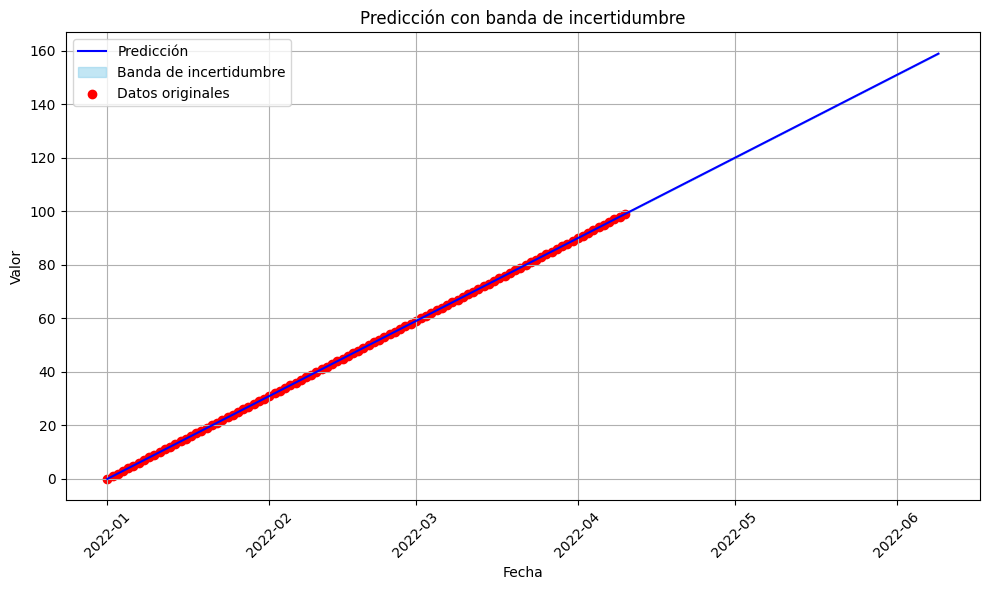

In [ ]:
import matplotlib.pyplot as plt

# Graficar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(prediccion['ds'], prediccion['yhat'], label='Predicción', color='blue')

# Graficar las bandas de incertidumbre
plt.fill_between(prediccion['ds'], prediccion['yhat_lower'], prediccion['yhat_upper'], color='skyblue', alpha=0.5, label='Banda de incertidumbre')

# Graficar los datos originales
plt.scatter(data['ds'], data['y'], color='red', label='Datos originales')

# Configuración del gráfico
plt.title('Predicción con banda de incertidumbre')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

# Rotar las etiquetas del eje x
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

